사람얼굴p203

In [18]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [7]:
people.target.shape, len(set(people.target_names)), people.images.shape

((3023,), 62, (3023, 87, 65))

In [8]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [5]:
len(set(people.target_names))

62

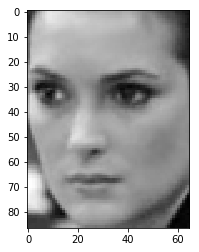

In [40]:
plt.imshow(people.images[0], cmap='gray')

##### (87 * 65) 이상의 명암을 주성분 100(10 * 10)개 변환해서 시각화
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) # whiten 정규화
pca_x = pca.transform(people.data)

In [23]:
people.data.shape, pca_x.shape, pca.components_.shape # 가장 잘 압축하고 있는 주성분으로 뽑는다.

((3023, 5655), (3023, 100), (100, 5655))

In [28]:
img = pca.components_.reshape([100, 87, 65]) # 주성분 갯수, 높이 너비
img.shape

(100, 87, 65)

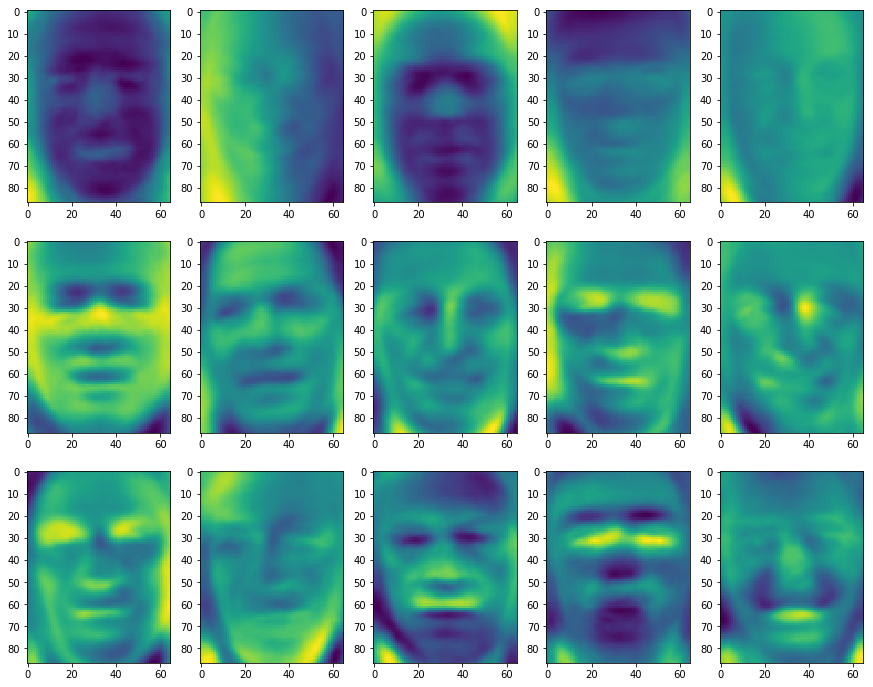

In [45]:
fig, ax = plt.subplots(3,5, figsize =(15,12))
for y in range(3):
    for x in range(5):
        ax[y,x].imshow(img[y*5+x])

In [46]:
len(set(people.target))

62

In [48]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [49]:
X = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [50]:
model = RidgeClassifier().fit(X_train,y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=2.0036e-11): result may not be accurate.
  overwrite_a=False)


In [51]:
model.score(X_train,y_train), model.score(X_test,y_test)

(1.0, 0.23677248677248677)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(pca_x,y)
model = RidgeClassifier(alpha=1).fit(X_train,y_train)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.5108072342302603, 0.3664021164021164)